In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
iris = load_iris()
X = iris.data 
y = iris.target
X = StandardScaler().fit_transform(X)
X = KBinsDiscretizer(encode='ordinal').fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y)
#print (X.shape)
#print (y.shape)

In [3]:
def entropy(y):
    n = len(y)
    _ , counts = np.unique(y, return_counts=True)
    p = counts / n
    return -np.sum(p * np.log2(p))

entropy(y)

1.584962500721156

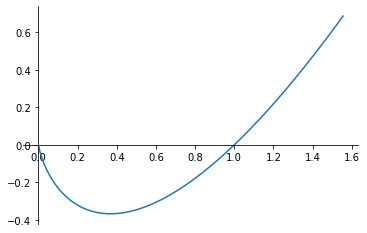

In [4]:
def plot_entropy():
    x = np.linspace(0.001,1.555,200)
    y = x * np.log(x)
    plt.clf()
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.plot(x,y)
    plt.show()
    
plot_entropy()

In [5]:
# a是属性a对应的列号
def gain_information(X,y,a):
    ent = entropy(y)
    n = len(y)
    A = X[:,a] # property a for set A
    A_vs = np.unique(A) # all A property
    for A_v in A_vs:
        D_v = y[A==A_v] # In y for A_v samples
        ent -= (len(D_v) / n) * entropy(D_v)
    return ent

In [6]:
# 信息增益越大,则意味着使用属性a来进行划分所得的纯度提升越大.
def gain_information_max(X,y):
    gain_info_max = 0
    gain_infos = []
    for a in range(X.shape[1]):
        gain_info_a = gain_information(X,y,a)
        gain_infos.append(gain_info_a)
        gain_info_max = max(gain_info_max,gain_info_a)
    return gain_info_max , gain_infos

print(gain_information_max(X,y))

(1.174132063276708, [0.6815771176540407, 0.39686187233660686, 1.174132063276708, 1.0933815548048391])


In [7]:
def intrinsic_value(X,y,a):
    iv = 0
    n = len(y)
    A = X[:,a] # property a for set A
    A_vs = np.unique(A) # all A property
    for A_v in A_vs:
        D_v = y[A == A_v] # In y for A_v samples
        dv_d_n = len(D_v) / n
        iv -= dv_d_n * np.log2(dv_d_n)
    return iv

intrinsic_value(X,y,0)

2.303146747183908

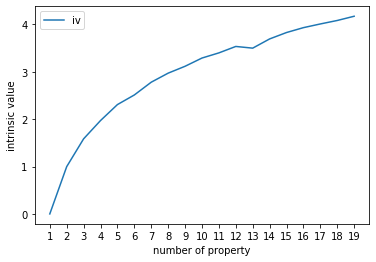

In [8]:
def plot_iv_change():
    n=100
    iv = []
    n_property = range(1,20)
    y = np.random.randint(1,size=n)
    for i in n_property:
        X = np.random.randint(0,i,size=n).reshape(-1,1)
        iv.append(intrinsic_value(X,y,0))
    plt.clf()
    plt.plot(n_property,iv,label='iv')
    plt.xlabel('number of property')
    plt.ylabel('intrinsic value')
    plt.xticks(n_property)
    plt.legend()
    plt.show()
plot_iv_change()

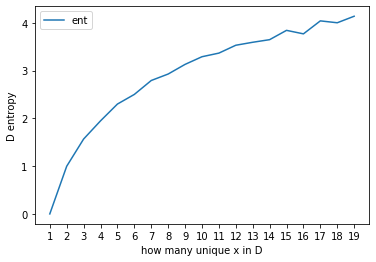

In [9]:
def plot_entropy_change():
    n= 100 
    ent = []
    x = range(1,20)
    for i in range(1,20):
        y = np.random.randint(0,i,size=n)
        ent.append(entropy(y))
    plt.clf()
    plt.plot(x,ent,label='ent')
    plt.xticks(x)
    plt.xlabel('how many unique x in D')
    plt.legend()
    plt.ylabel('D entropy')
    plt.show()

plot_entropy_change()

In [10]:
def gain_ratio(X,y,a):
    return gain_information(X,y,a)/intrinsic_value(X,y,a)

In [11]:
# 信息增益越大,则意味着使用属性a来进行划分所得的纯度提升越大.
def gain_ratio_max(X,y):
    gain_r_max = 0
    gain_rs = []
    for a in range(X.shape[1]):
        gain_r_a = gain_ratio(X,y,a)
        gain_rs.append(gain_r_a)
        gain_r_max = max(gain_r_max,gain_r_a)
    return gain_r_max , gain_rs

print(gain_ratio_max(X,y))

(0.5250810800560584, [0.29593299623109787, 0.17222377491394492, 0.5077012700965899, 0.5250810800560584])


In [12]:
def gini(y):
    n = len(y)
    uniques,counts = np.unique(y,return_counts=True)
    return 1 - np.sum((counts / n) ** 2 )
gini(y)

0.6666666666666667

In [13]:
def gini_index(X,y,a):
    n = len(y)
    A = X[:,a]
    A_vs = np.unique(A)
    gini_index =0
    for A_v in A_vs:
        D_v = y[A == A_v]
        gini_index += (len(D_v) / n) * gini(D_v)
    return gini_index

def gini_index_min(X,y):
    gini_index_min = sys.float_info.max
    gini_indexes = []
    for a in range(X.shape[1]):
        gini_index_a = gini_index(X,y,a)
        gini_index_min = min(gini_index_min,gini_index_a)
        gini_indexes.append(gini_index_a)
    
    return gini_index_min, gini_indexes

gini_index_min(X,y)

(0.18737418300653597,
 [0.40198807605259224,
  0.4995677565677566,
  0.18737418300653597,
  0.22191142191142188])

[0.         0.21478335 0.33760504 0.42753904 0.49283345 0.54860834
 0.59324668 0.63544516 0.67216789 0.69646442 0.73212686 0.75457775
 0.7809176  0.80648049 0.80994918 0.83085679 0.87083152 0.86148573
 0.8739348  0.89590984 0.90878801 0.92456934 0.92688379 0.93579433
 0.97062305 0.98255325 1.         0.99158841 0.97338757]
[0.         0.52213868 0.68984962 0.77965748 0.82811195 0.8625731
 0.88533835 0.90643275 0.92147034 0.92940685 0.9427736  0.94945698
 0.95655806 0.96449457 0.96157059 0.96700084 0.97994987 0.97472849
 0.97869674 0.98120301 0.9845447  0.98725982 0.98496241 0.98955723
 0.99415205 0.99749373 1.         0.99874687 0.99415205]


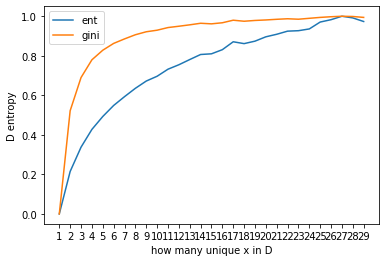

In [14]:
def plot_entropy_gini_change():
    x_n = 30
    n= 100 
    ent = []
    gi= []
    x = range(1,x_n)
    for i in x:
        y = np.random.randint(0,i,size=n)
        ent.append(entropy(y))
        gi.append(gini(y))
    plt.clf()
    gi = np.array(MinMaxScaler().fit_transform(np.array(gi).reshape(-1,1)).ravel())
    ent = MinMaxScaler().fit_transform(np.array(ent).reshape(-1,1)).ravel()
    print(ent)
    print(gi)
    plt.plot(x,ent,label='ent')
    plt.plot(x,gi,label='gini')
    plt.xticks(x)
    plt.xlabel('how many unique x in D')
    plt.ylabel('D entropy')
    plt.legend()
    plt.show()

plot_entropy_gini_change()

In [15]:
def get_A_unique_vals(X):
    A_unique_vals = []
    for i in range(X.shape[1]):
        A_unique_vals.append(np.unique(X[:,i]))
    return A_unique_vals
    #print(A_unique_vals)

In [16]:
def buildTree(X, y, A, A_unique_vs):
    # Todo 生成结点
    # 所有样本属于同一类别Ｃ，将该结点标记为C
    y_unique,y_counts = np.unique(y,return_counts=True)
    # print(y_counts,y_unique)
    if len(y_unique) == 1 :
        return y_unique[0]
    # 当前节点中的所有样本在当前属性集中取值相同，则直接返回当前数据集中类别样本多的那个类别
    y_max_label = y_unique[np.argmax(y_counts)]
    # print(y_max_label)
    same = True
    if len(A) > 0 :
        for a in A:
            if(len(np.unique(X[:,a])) != 1):
                same = False
                break
    if same:
        return y_max_label
    # 从A中选择最优划分属性.
    gini_indexes = []
    for a in A:
        gini_indexes.append(gini_index(X,y,a))
    gini_indexes = np.array(gini_indexes)
    # print(gini_indexes)
    # 最优特征的划分索引(列)
    A_best_feature_arg = A[np.argmin(gini_indexes)]
    # print(A_best_feature_arg)
    # 最优特征的所有特征值
    A_best_feature_vals = X[: , A_best_feature_arg]#会漏值.
    # print(np.unique(A_best_feature_vals))
    #print(A_best_feature_vals)
    my_tree = {A_best_feature_arg:{}}
    # 选择最优特征中
    A = np.delete(A, np.argmin(gini_indexes), axis=0)
    for a_v in A_unique_vs[A_best_feature_arg]:
        # D_v 表示在属性 A_best_feature_arg 取值为 a_v的样本子集
        A_v = A_best_feature_vals == a_v
        #print(A_best_feature_vals)
        #print(a)
        #print(A_v, " sum : ",np.sum(A_v))
        if np.sum(A_v) == 0:
            my_tree[A_best_feature_arg][a_v] = y_max_label
        else :
            y_A_v = y[A_v]
            X_A_v = X[A_v]
            my_tree[A_best_feature_arg][a_v] = buildTree(X_A_v ,y_A_v ,A, A_unique_vs)
    return my_tree
print(get_A_unique_vals(X))
# print(X[:10])
my_tree = buildTree(X,y,np.arange(X.shape[1]),get_A_unique_vals(X))
my_tree

[array([0., 1., 2., 3., 4.]), array([0., 1., 2., 3., 4.]), array([0., 1., 2., 3., 4.]), array([0., 1., 2., 3., 4.])]


{2: {0.0: 0,
  1.0: {1: {0.0: 1, 1.0: 1, 2.0: 0, 3.0: 0, 4.0: 0}},
  2.0: {0: {0.0: 2, 1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1}},
  3.0: {3: {0.0: 2,
    1.0: 2,
    2.0: 1,
    3.0: {1: {0.0: {0: {0.0: 1, 1.0: 1, 2.0: 2, 3.0: 1, 4.0: 1}},
      1.0: {0: {0.0: 2, 1.0: 2, 2.0: 1, 3.0: 2, 4.0: 2}},
      2.0: {0: {0.0: 2, 1.0: 2, 2.0: 2, 3.0: 2, 4.0: 1}},
      3.0: 1,
      4.0: 1}},
    4.0: 2}},
  4.0: 2}}

In [17]:
def tree_predict(my_tree,x):
    root_key = list(my_tree.keys())[0]  # 获取根节点的key
    root_val = my_tree[root_key]     # 获取根节点对应的value
    result = -1   # 初始化，用来保存当前节点的结果
    #print(root_key)
    #print(root_val)
    if(isinstance(root_val[x[root_key]], dict)):
        result = tree_predict(root_val[x[root_key]], x)
    else:
        result = root_val[x[root_key]]
    return result

def tree_predict_multi(my_tree, X):
    res = []
    for i in range(X.shape[0]):
        res.append(tree_predict(my_tree,X[i]))
    return np.array(res)

#print(np.c_[X_test[:10],y_test[:10].reshape(-1,1)])
#tree_predict(my_tree,X_test[4])
A = np.arange(X.shape[1])
my_tree = buildTree(X_train, y_train, A,get_A_unique_vals(X))
my_tree
#print(np.c_[X_test,y_test.reshape(-1,1)])

{2: {0.0: 0,
  1.0: {1: {0.0: 1, 1.0: 1, 2.0: 0, 3.0: 0, 4.0: 0}},
  2.0: {0: {0.0: 2, 1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1}},
  3.0: {3: {0.0: 2,
    1.0: 2,
    2.0: 1,
    3.0: {1: {0.0: {0: {0.0: 1, 1.0: 1, 2.0: 2, 3.0: 1, 4.0: 1}},
      1.0: {0: {0.0: 2, 1.0: 2, 2.0: 1, 3.0: 2, 4.0: 2}},
      2.0: 2,
      3.0: 1,
      4.0: 2}},
    4.0: 2}},
  4.0: 2}}

In [18]:
y_predict = tree_predict_multi(my_tree,X_test)
y_predict

array([2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2])

In [19]:
def tree_score_multi(my_tree,X_test,y_test):
    y_predict = tree_predict_multi(my_tree,X_test)
    score = np.sum(y_predict == y_test) / len(y_test)
    return score

In [20]:
y_test

array([2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2])

In [21]:
y_test == y_predict

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True])

In [22]:
score = np.sum(y_predict==y_test)/len(y_test)
score

0.9736842105263158

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
score = dt.score(X_test,y_test)
score

0.9473684210526315

In [24]:
def tree_score_sk(X_test,y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    score = dt.score(X_test,y_test)
    return score

In [25]:
# 测试有没有bug
iris = load_iris()
X = iris.data 
y = iris.target
X = StandardScaler().fit_transform(X)
X = KBinsDiscretizer(encode='ordinal').fit_transform(X)
A_unique_vals = get_A_unique_vals(X)
A = np.arange(X.shape[1])
scores = []
sk_scores = []
for test_i in range(200):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    my_tree = buildTree(X_train,y_train,A,A_unique_vals)
    scores.append(tree_score_multi(my_tree,X_test,y_test))
    sk_scores.append(tree_score_sk(X_test,y_test))
print('my tree score :' , np.mean(scores))
print('sk tree score :' , np.mean(sk_scores))

my tree score : 0.9510526315789474
sk tree score : 0.9348684210526315


In [1]:
决策函数

NameError: name '决策函数' is not defined